# Cryptocurrency analysis

This notebook is a demo to compare a few cryptocurrencies. 

In [164]:
import yfinance as yf
from IPython.display import display, Markdown

crypto_tickers = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD", "XRP-USD", "ADA-USD", "DOGE-USD", "AVAX-USD"]
ticker_infos = {}
for crypto in crypto_tickers:
    ticker = yf.Ticker(crypto)
    info_ = ticker.get_info()
    ticker_infos[crypto] = info_

display(Markdown("# Descriptions of cryptocurrencies \n Find below a short list with the name and description of a cryptocurrency."))
for crypto in crypto_tickers:
    display(Markdown("## " + ticker_infos[crypto]["name"] + f" ({crypto})"))
    display(Markdown(ticker_infos[crypto]["description"]))

# Descriptions of cryptocurrencies 
 Find below a short list with the name and description of a cryptocurrency.

## Bitcoin (BTC-USD)

Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,652,987. The last known price of Bitcoin is 73,224.69144209 USD and is up 1.64 over the last 24 hours. It is currently trading on 10891 active market(s) with $63,731,429,937.76 traded over the last 24 hours. More information can be found at https://bitcoin.org/.

## Ethereum (ETH-USD)

Ethereum (ETH) is a cryptocurrency . Ethereum has a current supply of 120,089,623.3167966. The last known price of Ethereum is 4,051.9704251 USD and is up 1.00 over the last 24 hours. It is currently trading on 8532 active market(s) with $26,350,777,114.44 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.

## BNB (BNB-USD)

BNB (BNB) is a cryptocurrency . BNB has a current supply of 149,539,535.7327692. The last known price of BNB is 573.80308085 USD and is up 7.72 over the last 24 hours. It is currently trading on 2092 active market(s) with $4,492,126,045.54 traded over the last 24 hours. More information can be found at https://bnbchain.org/en.

## Solana (SOL-USD)

Solana (SOL) is a cryptocurrency launched in 2020. Solana has a current supply of 571,688,293.5977858 with 443,534,405.8703067 in circulation. The last known price of Solana is 152.29414634 USD and is up 0.03 over the last 24 hours. It is currently trading on 637 active market(s) with $5,595,784,007.66 traded over the last 24 hours. More information can be found at https://solana.com.

## XRP (XRP-USD)

XRP (XRP) is a cryptocurrency . XRP has a current supply of 99,987,824,103 with 54,736,825,690 in circulation. The last known price of XRP is 0.69568428 USD and is down -0.30 over the last 24 hours. It is currently trading on 1247 active market(s) with $3,258,366,308.65 traded over the last 24 hours. More information can be found at https://xrpl.org/.

## Cardano (ADA-USD)

Cardano (ADA) is a cryptocurrency launched in 2017. Cardano has a current supply of 36,700,287,535.801 with 35,552,242,072.935 in circulation. The last known price of Cardano is 0.76481323 USD and is up 2.42 over the last 24 hours. It is currently trading on 1096 active market(s) with $957,562,603.50 traded over the last 24 hours. More information can be found at https://www.cardano.org.

## Dogecoin (DOGE-USD)

Dogecoin (DOGE) is a cryptocurrency . Users are able to generate DOGE through the process of mining. Dogecoin has a current supply of 143,447,756,383.7052. The last known price of Dogecoin is 0.1718569 USD and is up 0.39 over the last 24 hours. It is currently trading on 917 active market(s) with $2,502,985,540.06 traded over the last 24 hours. More information can be found at http://dogecoin.com/.

## Avalanche (AVAX-USD)

Avalanche (AVAX) is a cryptocurrency launched in 2020. Avalanche has a current supply of 436,001,068.54570794 with 377,311,428.54570794 in circulation. The last known price of Avalanche is 53.97892231 USD and is up 13.48 over the last 24 hours. It is currently trading on 679 active market(s) with $2,517,986,657.86 traded over the last 24 hours. More information can be found at https://avax.network/.

# Performance and risk analysis

First we collect the current price, market cap and volume.

In [165]:
from datetime import date

today_ = date.today().strftime("%Y-%m-%d")
prices, vols, caps = [], [], []

for crypto in crypto_tickers:
    prices.append(ticker_infos[crypto]["previousClose"])
    vols.append(ticker_infos[crypto]["volume"])
    caps.append(ticker_infos[crypto]["marketCap"])

df_info = pd.DataFrame([prices, caps, vols], columns = crypto_tickers, index = ["Previous Close Price", "Market Capitalization", "Volume"]).transpose()
df_info.index.name = today_
df_info

,Previous Close Price,Market Capitalization,Volume
2024-03-13,,,
BTC-USD,71471.520000,1.429572e+12,6.283426e+10
ETH-USD,3980.081300,4.834253e+11,2.541985e+10
BNB-USD,537.872440,8.839652e+10,5.175398e+09
SOL-USD,151.029310,6.800799e+10,5.554334e+09
XRP-USD,0.688204,3.756261e+10,3.103132e+09
ADA-USD,0.748035,2.702431e+10,9.617561e+08
DOGE-USD,0.168166,2.429153e+10,2.474332e+09
AVAX-USD,55.570827,2.041653e+10,2.507305e+09


Next let us collect daily price data and determine the discrete returns $r_t$:

$$
r_t = \frac{p_t}{p_{t-1}} - 1
$$

where $p_t$ represents the price at 11:59 p.m. every day. Below, we take a look at some descriptive statistics and find BTC and SOL to have the highest risk-adjusted performance. 

In [166]:
import warnings
warnings.filterwarnings('ignore')

price_data = yf.download(crypto_tickers, period = "1y")
cum_total_returns = price_data.loc[:, (["Adj Close"])].divide(price_data.loc[:, (["Adj Close"])].iloc[0]).loc[:, "Adj Close"]
discrete_returns = price_data.loc[:, "Adj Close"].pct_change().dropna()
descriptive_statistics = discrete_returns.describe(percentiles=(0.05, 0.95)).drop("count").round(4)
descriptive_statistics.loc["mean/std"] = descriptive_statistics.loc["mean"] / descriptive_statistics.loc["std"]
descriptive_statistics

[*********************100%%**********************]  8 of 8 completed


Ticker,ADA-USD,AVAX-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,SOL-USD,XRP-USD
mean,0.002800,0.004100,0.0021,0.003300,0.003000,0.00270,0.006500,0.002700
std,0.036400,0.042900,0.0250,0.023000,0.038500,0.02420,0.045300,0.050100
min,-0.100900,-0.151600,-0.1070,-0.075800,-0.158400,-0.07990,-0.116900,-0.138000
5%,-0.050800,-0.058400,-0.0323,-0.030600,-0.053100,-0.03610,-0.057600,-0.046700
50%,0.001000,0.003200,0.0018,0.000700,0.001100,0.00080,0.001400,0.000100
95%,0.059600,0.072900,0.0440,0.045100,0.056500,0.04410,0.092800,0.051300
max,0.238600,0.213200,0.1146,0.103100,0.214800,0.12240,0.246400,0.730800
mean/std,0.076923,0.095571,0.0840,0.143478,0.077922,0.11157,0.143488,0.053892


To examine which currency had the highest price increase over the past year we divide each price by its starting value one year ago. This gives us the ability to compare the relative performance over time. 

<Axes: xlabel='Date'>

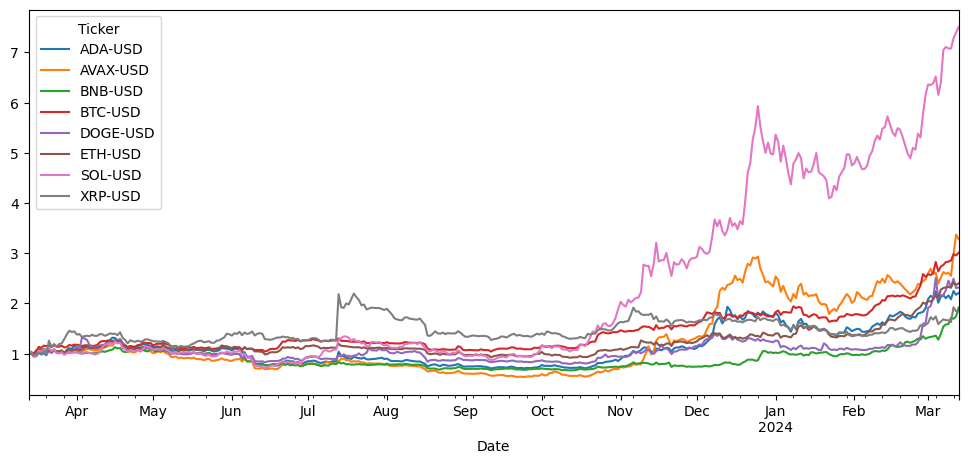

In [168]:
cum_total_returns.plot(figsize = (12, 5))

Besides the value change, we can also take a look at daily returns over time.

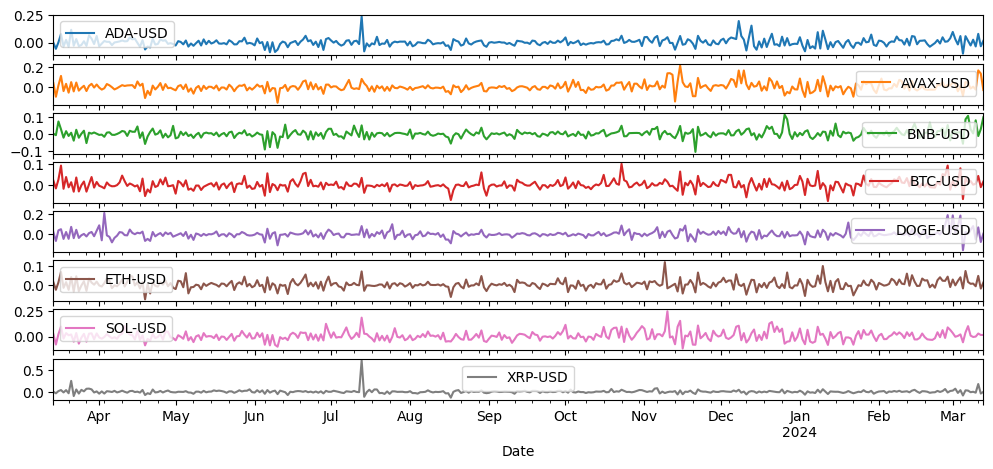

In [174]:
import matplotlib.pylab as plt

discrete_returns.plot(subplots = True, figsize = (12, 5))
plt.show()

If we invest in more than one curreny, it is very important to examine dependencies among the currencies as well. Below you can do this by a heatmap of the linear Bravais-Pearson correlation measure. 

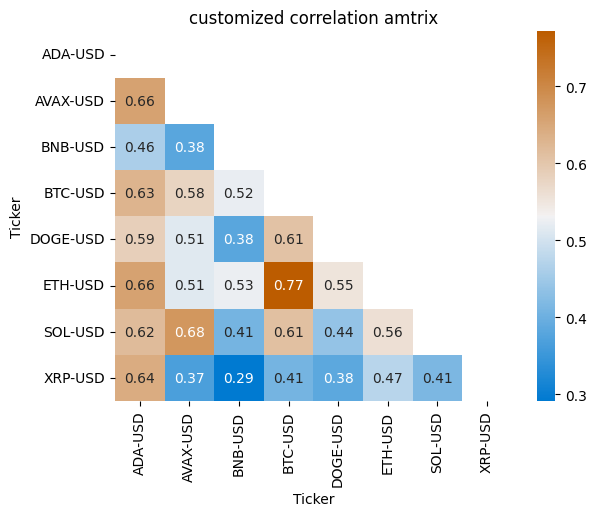

In [177]:
import seaborn as sns
import numpy as np

corr_mat = discrete_returns.corr()

# create mask
mask = np.triu(np.ones_like(corr_mat))

# create custom colour bar
cmap = sns.diverging_palette(250, 390, l=50, s=100, as_cmap=True)

sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap=cmap)
plt.title('customized correlation amtrix')
plt.show()